In [31]:
import matplotlib.pyplot as plt


In [32]:
%matplotlib inline

In [121]:
data = [12,46,78,12,24,52,14,8,67,17,34,45,62,12,32,53]

## Mean 
- Average = sum(data) / len(n)


In [6]:
avg = sum(data)/len(data)
avg

35.5

## Median
- if length is odd - Center element after sorting 
- if length is even - mean of center two elements

In [19]:
t = data
t.sort()
length = len(t)
print(t)
print("lenth is even : ", length)
median = (t[7]+t[8])//2
print("Median : ", median, "Mean of 32 and 34")


[8, 12, 12, 12, 14, 17, 24, 32, 34, 45, 46, 52, 53, 62, 67, 78]
lenth is even :  16
Median :  33 Mean of 32 and 34


## Mode 
- most repeated element

- 12 is repeated thrice in the dataset

## Percentile
- Formula
- index = (percentile/100) * N

Example
Get 25 percentile in the dataset 

index = 25/100 * 16

data[index]




In [27]:
index_raw = (30/100)*len(data)
index = round(index_raw)
value = data[index]
print("percentile 25 ", ", raw_index : ", index_raw,", Index : ", index, ", Value : ", value)

percentile 25  , raw_index :  4.8 , Index :  5 , Value :  17


## Box and whisker plot | Quartile

- Boxplot splits dataset in to 4 quartiles, 25%, 50%, 75% and 100%.
- The range between 75% and 25% is known as Inter Quartile Region(IQR)
- The data points above and below 1.5 * IQR are known as outliers.



{'whiskers': [<matplotlib.lines.Line2D at 0x19e5d00d648>,
 'caps': [<matplotlib.lines.Line2D at 0x19e5cc3aac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e5d00d9c8>],
 'medians': [<matplotlib.lines.Line2D at 0x19e5cc25508>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e5cc25208>],
 'means': []}

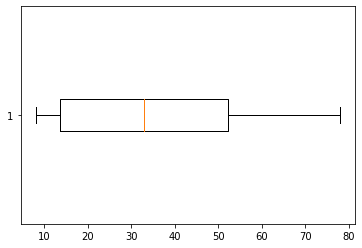

In [34]:
plt.boxplot(data, vert=False)

## Lets add some outliers and see

In [78]:
t = data.copy()
t.extend([-80,180,140])

{'whiskers': [<matplotlib.lines.Line2D at 0x19e5ed54908>,
 'caps': [<matplotlib.lines.Line2D at 0x19e5ed596c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e5ed4ff88>],
 'medians': [<matplotlib.lines.Line2D at 0x19e5ed59f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e5ed5fc08>],
 'means': []}

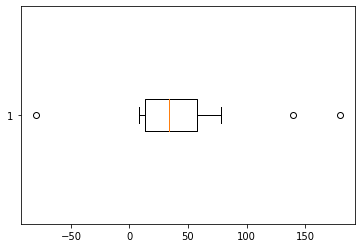

In [79]:
plt.boxplot(t, vert=False)

## Variance 
- The average of the squared differences from the Mean.
- v^2 = sum( (data - mean)^2 ) / n

In [122]:
t = data.copy()
t.extend([80,60,50,40,30,20,10,15,25,35,45,55,65])
data = t

In [123]:
mean = sum(data)/len(data)
mean

37.86206896551724

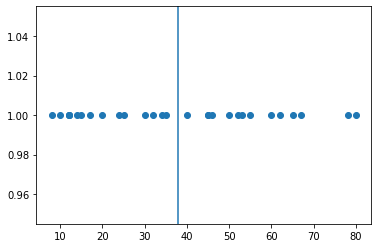

In [124]:
plt.scatter(data, len(data) * [1])
plt.axvline(mean)

In [125]:
total = sum([ (i - mean)**2 for i in data ]) / len(data)
total

451.2223543400713

## The Standard Deviation is a measure of how spread out numbers are.
It is the square root of the Variance.


In [126]:
sd = (total)**(1/2)
sd

21.24199506496674

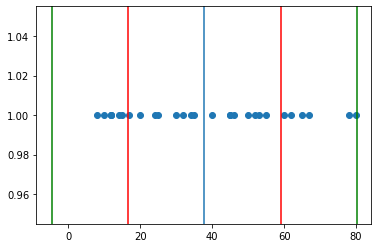

In [127]:

plt.scatter(data, len(data) * [1])

plt.axvline(mean)
plt.axvline(mean - sd, c = "r")
plt.axvline(mean + sd, c = "r")
plt.axvline(mean - (2*sd), c = "g")
plt.axvline(mean + (2*sd), c = "g")

## Covariance 
- Covariance is a statistical tool that is used to determine the relationship between the movement of two variables.
- covariance = sum((x-xmean) * ( y - ymean)) / n
- If ρ(X,Y)=0, we say that X and Y are uncorrelated.
- If ρ(X,Y)>0, we say that X and Y are positively correlated.
- If ρ(X,Y)<0, we say that X and Y are negatively correlated.
- Higher or lower number doesn't signifies anything because if scale increases the value also increases

In [152]:
def covariance(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    n = min(len(x), len(y))
    total = 0
    for i in range(n):
        total += (x[i] - mean_x) * (y[i] - mean_y)
    return total / n
    

In [144]:
x = [1,2,3,4,5]
y_zero = [3,3,3,3,3]
y_positive = [1,2,3,4,5]
y_negative = [5,4,3,2,1]

covariance :  0.0


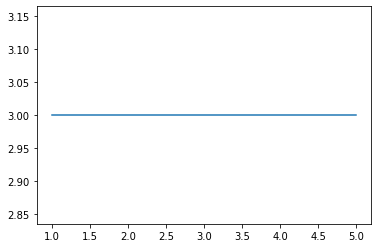

In [156]:
print("covariance : ", covariance(x,y_zero))
plt.plot(x,y_zero)

+ve covariance
covariance :  2.0


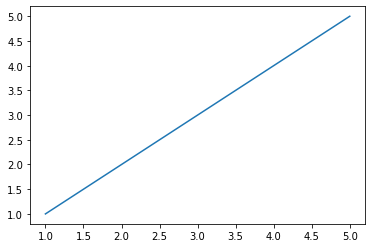

In [154]:
print("+ve covariance")
print("covariance : ", covariance(x,y_positive))
plt.plot(x,y_positive)

-ve covariance
covariance :  -2.0


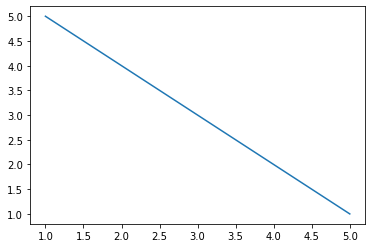

In [155]:
print("-ve covariance")
print("covariance : ", covariance(x,y_negative))
plt.plot(x,y_negative)

## Correlation
- When two sets of data are strongly linked together we say they have a High Correlation.
- Covariance depends on scale. In order to make it independent. we devide it by standard deviation
- correlation = covariance(x,y) / standardDeviation of (x,y)
- postivie when both increases and negative when both decreases.
- zero when no coreelation exists.
- magnitude of value defines how both the data are strongly related

In [161]:
def mean(arr):
    return sum(arr)/len(arr)
    

def standard_deviation(arr):
    m = mean(arr)
    return (sum( [(m - i)**2 for i in arr] ) / len(arr)) ** (1/2)

def correlation(x,y):
    cv = covariance(x,y)
    return cv / (standard_deviation(x) * standard_deviation(y))

In [163]:
correlation(x,y_positive)

0.9999999999999998

In [164]:
correlation(x,y_negative)

-0.9999999999999998

In [185]:
x = [1,2,3,4,5,6,7,8,9,10]
y1 = [9,12,25,36,42,55,61,79,91,102]
y2 = [2,22,18,49,67,62,90,101,120,140]
y3 = [2,30,14,52,22,90,66,44,120,99]

[9, 12, 25, 36, 42, 55, 61, 79, 91, 102]
correlation :  0.994192057763551


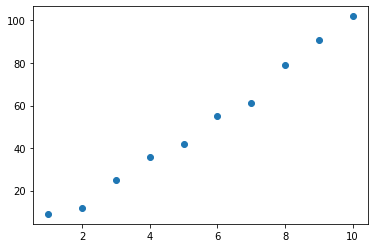

In [188]:
print(y1)
print("correlation : ", correlation(x,y1))
plt.scatter(x,y1)

[2, 22, 18, 49, 67, 62, 90, 101, 120, 140]
correlation :  0.9874415012821398


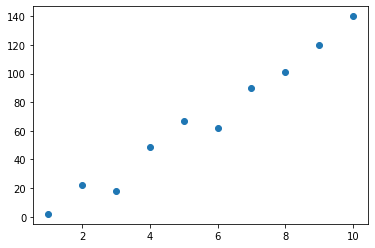

In [189]:
print(y2)
print("correlation : ", correlation(x,y2))
plt.scatter(x,y2)

[2, 30, 14, 52, 22, 90, 66, 44, 120, 99]
correlation :  0.825280387327048


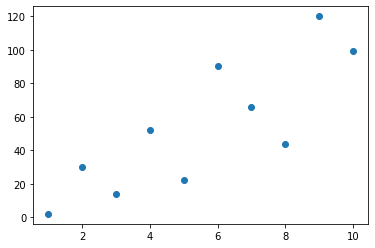

In [190]:
print(y3)
print("correlation : ", correlation(x,y3))
plt.scatter(x,y3)